# Neural network from scratch

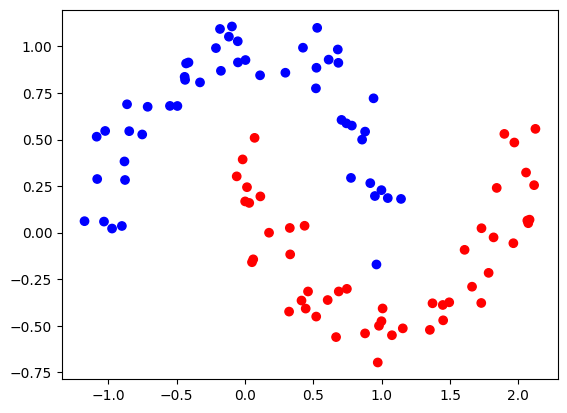

In [ ]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

X, Y = datasets.make_moons(100, noise=0.1)

color = ['blue' if k == 0 else 'red' for k in Y]

plt.scatter(X[:, 0], X[:, 1], c=color)
plt.savefig('duas_luas.svg')


## Below I define some of the activation functions and aux functions that will be used during training.

### Sigmoid function

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(fx):
    return fx * (1 - fx)

### Softmax function

 Quando usamos a função softmax para a última camada de ativação, temos como resultante um vetor contendo as probabilidades de pertencimento do padrão a cada classe. Neste cenário, usaremos a função Cross Entropy Loss, para calcular nossa função erro, já que temos que lidar com um vetor e não um valor único.

A função Cross-Entropy Loss é definida como segue:

$\displaystyle  
L(y, s) = -\sum_i^c y_i \log{s_i}
$

 Onde $\displaystyle c$ é o número de classes, $\displaystyle i$ representa o índice do vetor, $\displaystyle y$ é o vetor target e $\displaystyle s$ é o vetor de probabilidades, calculado pela pela softmax.

A partir dessa definição e da definição da função softmax podemos derivar a derivada parcial desta em relação à variável $\displaystyle z$, sendo $\displaystyle z$ a última camada de neurônios da rede.

$\displaystyle  
\frac{\partial L(y, s)}{\partial z_j}= -\frac{\partial}{\partial z_j}\sum_i^c y_i \log{s_i}
$

Efetuando esta conta, obtemos:

 $\displaystyle
 \frac{\partial L(y, s)}{\partial z_j} = s_j - y_j
 $

In [ ]:
def softmax(v): #takes a vector as input, of shape equal to the number of classes
  exp_values = np.exp(v)
  return exp_values / np.sum(exp_values) # returns a vector of shape equal to the number of classes, representing the probability for x belonging to each class

def one_hot_encoder(x):
  '''
  Receives a value N which is either 0 or 1,
  Returns a one-hot-encoded vector, with 1 in the position N and zeros otherwise
  '''
  ohe = np.zeros((2,)) # shape = number of classes, in our case we have 2 classes
  ohe[int(x)] = 1
  return ohe

def cross_entropy_loss(target, y_pred):
  d = one_hot_encoder(target)
  L=0
  for i in range(len(y_pred)):
    L += -d[i]*np.log(y_pred[i])
  return L

def derivative_cross_entropy_loss(softmax_prob, target):
  grad_ce = softmax_prob - target
  return grad_ce

def softmax_derivative(sx): # recebe o vetor y2, com as saídas para cada classe, shape (2,)
  #sx = np.diag(sx)
  derivative_matrix = np.matmul(sx, (np.diag(np.ones(np.shape(sx)[0])) - sx))
  return derivative_matrix

In [ ]:
def activation_function(v, function):
    if function == 'sigmoid':
        return sigmoid(v)
    elif function == 'softmax':
        return softmax(v)

def derivative_activation_function(x, function):
    if function == 'sigmoid':
        return sigmoid_derivative(x)
    elif function == 'softmax':
        grad_softmax = softmax_derivative(x)
        return grad_softmax

# Neural network with two hidden layers

In [ ]:
def initialization(w0, b0, b1, w1, w2, b2):
    # ensuring the shape
    w0 = w0.reshape((2, 2))
    w1 = w1.reshape((2, 2))
    w2 = w2.reshape((2))
    b0 = b0.reshape((2,))
    b1 = b1.reshape((2,))
    # initialization
    v0, v1, y0, y1 = [np.zeros((2,)) for _ in range(4)]
    v2 = 0
    return  w0, b0, b1, w1, w2, b2, v0, v1, y0, y1, v2
def grad_initialization():
    # initialization
    grad_w0, grad_w1 = [np.zeros((2, 2)) for _ in range(2)]
    grad_w2, grad_b0, grad_b1, grad_y1, grad_v1, grad_y0, grad_v0 = [np.zeros((2,)) for _ in range(7)]

    return grad_w0, grad_w1, grad_w2, grad_b0, grad_b1, grad_y1, grad_v1, grad_y0, grad_v0

## Running the network

In [ ]:
def run_neural_net(x, w0, b0, b1, w1, w2, b2, activation, out_activation):

    w0, b0, b1, w1, w2, b2, v0, v1, y0, y1, v2 = initialization(w0, b0, b1, w1, w2, b2)

    v0 = np.matmul(w0, x) + b0 # vector of shape (2,)
    y0 = activation_function(v0, activation) # must return vector of shape (2,)
    v1 = np.matmul(w1, y0) + b1 # vector of shape (2,)
    y1 = activation_function(v1, activation) # must return vector of shape (2,)

    if out_activation=='sigmoid':
      v2 = np.matmul(w2, y1) + b2 # array of shape (1)
    elif out_activation=='softmax':
      v2 = w2* y1 + b2 # array of shape (2,)
    y2 = activation_function(v2, out_activation) # array of shape (1) for sigmoid, (2,) for softmax

    if out_activation=='sigmoid':
        return 1 if y2 > 0.5 else 0
    elif out_activation=='softmax':
        return 1 if y2[1] > 0.5 else 0 # vetor com as probabilidades para cada classe

## Backpropagation

In [ ]:
def grad_neural_net(x, d, w0, b0, b1, w1, w2, b2, activation, out_activation):

    w0, b0, b1, w1, w2, b2, v0, v1, y0, y1, v2 = initialization(w0, b0, b1, w1, w2, b2)

    v0 = np.matmul(w0, x) + b0 # array of shape (2,)
    y0 = activation_function(v0, activation) # array of shape (2,)
    v1 = np.matmul(w1, y0) + b1 # array of shape (2,)
    y1 = activation_function(v1, activation) # array of shape (2,)

    if out_activation=='sigmoid':
      v2 = np.matmul(w2, y1) + b2 # array of shape (1)
    elif out_activation=='softmax':
      v2 = w2*y1 + b2 # array of shape (2,)

    y2 = activation_function(v2, out_activation) # array of shape (1) for sigmoid, (2,) for softmax

    if out_activation=='sigmoid':
      e = y2 - d
      L = e[0]**2
    elif out_activation=='softmax':
      L = cross_entropy_loss(d, y2)

    # backward
    grad_w0, grad_w1, grad_w2, grad_b0, grad_b1, grad_y1, grad_v1, grad_y0, grad_v0  = grad_initialization()

    if out_activation=='sigmoid':
        grad_y2 = e
        grad_v2 = grad_y2 * derivative_activation_function(y2, out_activation) # shape (1) if sigmoid
        grad_b2 = grad_v2.reshape((1,)) # shape (1)
    elif out_activation=='softmax':
        d = one_hot_encoder(d)
        grad_v2 = (y2 - d)
        grad_b2 = grad_v2.reshape((2,))

    grad_w2 = grad_v2 * y1 # array of shape (1,2)
    grad_w2 = grad_w2.reshape((2,))
    grad_y1 = grad_v2 * w2 # array of shape (2,)

    grad_v1 = grad_y1 * derivative_activation_function(y1, activation) #.reshape((2,)) # array of shape (2,)
    grad_b1 = grad_v1.reshape((2,))

    grad_w1 = np.outer(grad_v1, y0) # array of shape (2,2), produto exterior
    grad_y0 = np.matmul(grad_v1, w1) # array of shape (2,)

    grad_v0 = grad_y0 * derivative_activation_function(y0, activation) # array of shape (2,)

    grad_b0 = grad_v0.reshape((2,))
    grad_w0 = np.outer(grad_v0, x) # array of shape (2,2), produto exterior

    return grad_w0, grad_b0, grad_w1, grad_b1, grad_w2, grad_b2, L

## Initialization

In [ ]:
def initialization_weights(activation):
    w0 = np.random.rand(2, 2) - 0.5
    w1 = np.random.rand(2, 2) - 0.5
    w2 = np.random.rand(2,) - 0.5
    b0 = np.zeros(2,) - 0.5
    b1 = np.zeros(2,) - 0.5

    if activation == 'sigmoid':
      b2 = np.zeros(1) - 0.5
    elif activation == 'softmax':
      b2 = np.zeros(2,) - 0.5

    return w0, w1, w2, b0, b1, b2

def grad_initialization_main(activation):
    grad_w0 = np.zeros((2, 2))
    grad_w1 = np.zeros((2, 2))
    grad_w2 = np.zeros((2))
    grad_b0 = np.zeros((2,))
    grad_b1 = np.zeros((2,))
    if activation == 'sigmoid':
      grad_b2 = np.zeros((1))
    elif activation == 'softmax':
      grad_b2 = np.zeros((2,))
    return grad_w0, grad_w1, grad_w2, grad_b0, grad_b1, grad_b2

### Main function

In [ ]:
def main(taxa, activation, out_activation):
    w0, w1, w2, b0, b1, b2 = initialization_weights(out_activation)
    acc = 0
    for i in range(100):
        out = run_neural_net(X[i], w0, b0, b1, w1, w2, b2, activation, out_activation)
        if out == Y[i]:
            acc += 1
    print('baseline accuracy:', acc)
    loss_hist = []
    for epoch in range(9000):
        loss = 0

        grad_w0, grad_w1, grad_w2, grad_b0, grad_b1, grad_b2 = grad_initialization_main(out_activation)

        for k in range(100):
            g_w0, g_b0, g_w1, g_b1, g_w2, g_b2, L = grad_neural_net(X[k], Y[k], w0, b0, b1, w1, w2, b2, activation, out_activation)

            grad_w0 += g_w0
            grad_w1 += g_w1
            grad_w2 += g_w2
            grad_b0 += g_b0
            grad_b1 += g_b1
            grad_b2 += g_b2
            loss += L

        w0 -= taxa * grad_w0
        w1 -= taxa * grad_w1
        w2 -= taxa * grad_w2
        b0 -= taxa * grad_b0
        b1 -= taxa * grad_b1
        b2 -= taxa * grad_b2

        if epoch % 1000 == 0:
            print("Epoch:", epoch, "Loss:", loss)

        loss_hist.append(loss)

    acc = 0
    for test_index in range(100):
        out = run_neural_net(X[test_index], w0, b0, b1, w1, w2, b2, activation, out_activation)
        if out == Y[test_index]:
            acc += 1
    print('Final acc: ', acc)
    return loss_hist

### Grid-Search

In [ ]:
def grid_search(taxa:list, activation:list, out_activation:list):
  history = []
  params = []
  for alpha in taxa:
    for act in activation:
      for out_act in out_activation:
        params.append([alpha, act, out_act])
        history.append(main(alpha, act, out_act))
  return history, params


## Tests

In [ ]:
history, params = grid_search(taxa=[0.1, 0.01], activation=['sigmoid'], out_activation=['sigmoid', 'softmax'])

baseline accuracy: 50
Epoch: 0 Loss: 25.85480396002689
Epoch: 1000 Loss: 8.463414401741046
Epoch: 2000 Loss: 8.34802093131313
Epoch: 3000 Loss: 8.289348656101888
Epoch: 4000 Loss: 8.314288357607943
Epoch: 5000 Loss: 8.28680549033298
Epoch: 6000 Loss: 8.267308368322388
Epoch: 7000 Loss: 8.250068524821943
Epoch: 8000 Loss: 8.232234962282323
Final acc:  88
baseline accuracy: 50
Epoch: 0 Loss: 69.33903231904861
Epoch: 1000 Loss: 32.1525772308017
Epoch: 2000 Loss: 29.699970916079693
Epoch: 3000 Loss: 23.407476949836127
Epoch: 4000 Loss: 22.974601820440856
Epoch: 5000 Loss: 22.14256837688991
Epoch: 6000 Loss: 21.622131410960343
Epoch: 7000 Loss: 21.407732966005046
Epoch: 8000 Loss: 21.294760307726325
Final acc:  88
baseline accuracy: 50
Epoch: 0 Loss: 25.959189629892958
Epoch: 1000 Loss: 8.781636668113485
Epoch: 2000 Loss: 8.564989069879461
Epoch: 3000 Loss: 8.524601836770215
Epoch: 4000 Loss: 8.496573908674147
Epoch: 5000 Loss: 8.474619927028318
Epoch: 6000 Loss: 8.456739243805707
Epoch: 70

## Visualizing the loss curve

In [ ]:
import plotly.graph_objects as go
from plotly.colors import n_colors

n_epochs = 12000
colors = ['#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52', '#636EFA', '#EF553B', '#00CC96', '#AB63FA']

line = go.Figure()
for index, row in enumerate(history):
  labels = dict(zip(['alpha', 'hidden', 'output'], params[index]))
  line.add_trace(go.Scatter(
        x=np.arange(1000),
        y=row[:1000],
        name=str(labels),
        mode='lines+text',
        line=dict(color=colors[index], width=4)))

line.layout.update(title=dict(text="Loss curve"), title_font = dict(size=18),
                   plot_bgcolor='rgba(0,0,0,0)',
                   xaxis=dict(title="Epochs"),
                   yaxis=dict(title="Loss"),
                   width = 900, height=600)

line.layout.update(margin=dict(l=10, r=10, b=50, t=150))
line.update_xaxes(showline=True, linewidth=1, linecolor='rgba(169, 169, 169, 1)')

line.show()